In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from scipy.io import loadmat
path=r"C:\Users\xuhao_yang\PycharmProjects\sz5\data\ex6data1.mat"

In [5]:
data=loadmat(path)
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

In [6]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [7]:
from sklearn.svm import SVC,LinearSVC

In [9]:
linear_svc=LinearSVC()
svc_linear=SVC(kernel="linear")
svc_rbf=SVC(kernel="rbf")
svc_poly=SVC(kernel="poly")
x=data["X"]
y=data["y"]
linear_svc.fit(x,y.ravel())
svc_linear.fit(x,y.ravel())
svc_rbf.fit(x,y.ravel())
svc_poly.fit(x,y.ravel())

C:\Users\xuhao_yang\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\xuhao_yang\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [10]:
linear_svc.score(x,y.ravel())

0.9803921568627451

In [11]:
svc_linear.score(x,y.ravel())

0.9803921568627451

In [12]:
svc_rbf.score(x,y.ravel())

1.0

In [13]:
svc_poly.score(x,y.ravel())

1.0

In [55]:
def plot_svc(svc,x,y,h=0.02):
    x_min,x_max=x[:,0].min()-1,x[:,0].max()+1
    y_min,y_max=x[:,1].min()-1,x[:,1].max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                      np.arange(y_min,y_max,h))
    Z=svc.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contour(xx,yy,Z,cmap=plt.cm.RdYlBu,alpha=0.2)
    plt.scatter(x[:,0],x[:,1],s=10,c=y.ravel(),cmap="rainbow")
    sv=svc.support_vectors_
    plt.scatter(sv[:,0],sv[:,1],c="k",linewidths="1")
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)
    plt.show()

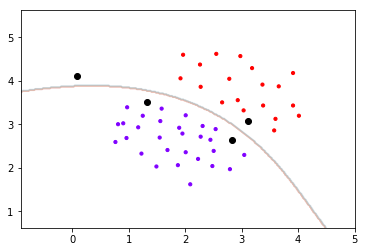

In [56]:
plot_svc(svc_poly,x,y)
# linear_svc.support_vectors